In [1]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")

In [2]:
ohio_samples = pd.read_csv(ZipFile('../../measurements/USGS stream data/MICHIGAN samples.zip').open(name='result.csv'))


/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (5,7,8,9,10,11,13,14,16,18,19,20,22,23,24,25,30,32,33,35,36,37,39,40,41,42,43,44,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
stations = pd.read_csv(ZipFile('../../measurements/USGS stream data/MICHIGAN stations.zip').open(name='station.csv'))

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3018: DtypeWarning: Columns (5,14,27,28,29,32,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
location = (42.859521, -82.736878)

In [5]:
delta_xy = 1
r_stations = stations[(stations.LatitudeMeasure>location[0]-delta_xy) & (stations.LatitudeMeasure<location[0]+delta_xy) &
                     (stations.LongitudeMeasure>location[1]-delta_xy) & (stations.LongitudeMeasure<location[1]+delta_xy)]

In [21]:
csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(r_stations.MonitoringLocationIdentifier.unique())]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
# csv_file_df['']
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
df = csv_file_df
df = csv_file_df[(csv_file_df['CharacteristicName']=="Phosphorus") & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995)]
df.shape              

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(5659, 63)

In [22]:
Show_IDS = [[st, False] for st in df.MonitoringLocationIdentifier.unique()] 

In [23]:
Show_IDS

[['USGS-04143701', False],
 ['USGS-04143830', False],
 ['USGS-04145923', False],
 ['USGS-04148035', False],
 ['USGS-04150592', False],
 ['USGS-04150869', False],
 ['USGS-04159482', False],
 ['USGS-04159492', False],
 ['USGS-04160055', False],
 ['USGS-04160075', False],
 ['USGS-04160800', False],
 ['USGS-04160900', False],
 ['USGS-04161000', False],
 ['USGS-04161540', False],
 ['USGS-04161580', False],
 ['USGS-04161810', False],
 ['USGS-04161820', False],
 ['USGS-04164007', False],
 ['USGS-04165500', False],
 ['USGS-04165553', False],
 ['USGS-04165710', False],
 ['USGS-04166000', False],
 ['USGS-04166100', False],
 ['USGS-04166200', False],
 ['USGS-04166300', False],
 ['USGS-04166315', False],
 ['USGS-04166500', False],
 ['USGS-04166700', False],
 ['USGS-04167150', False],
 ['USGS-04168400', False],
 ['USGS-04168550', False],
 ['USGS-04168557', False],
 ['USGS-041686401', False],
 ['USGS-04170000', False],
 ['USGS-04170500', False],
 ['USGS-04174500', False],
 ['USGS-04175100', False],


In [45]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon



# m = folium.Map(width=500,height=300, location=location, zoom_start=11.,tiles="OpenStreetMap", attr='Global Water Futures')
m = folium.Map(width=700,height=500, 
                location=location,
               control_scale = True,
                 zoom_start=9.5,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

# show all
# for index, st_dic in enumerate(Show_IDS):
#     st = st_dic[0]
#     N = df[df.MonitoringLocationIdentifier==st].shape[0]
#     if N>0:
#         st_df = stations[stations.MonitoringLocationIdentifier == st]
#         folium.Marker(location=[st_df.LatitudeMeasure.values[0], 
#                                 st_df.LongitudeMeasure.values[0]], 
#                                   popup=folium.Popup(html=st_df.MonitoringLocationIdentifier.values[0] + '\n' + 'N:{}'.format(N),
#                                 show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                      ).add_to(m)



Show_IDS = [
["21MICH_WQX-740016", True],
["21MICH_WQX-740385", False],
["USGS-04159130", True],
["21MICH_WQX-740376", False],
]

ignore_indx = [2,3]

for index, st_dic in enumerate(Show_IDS):
    st = st_dic[0]
    print(st)
    if st_dic[1]:
        clr='#f44242'
    else:
        clr='#0b15c4'
    st_df = stations[stations.MonitoringLocationIdentifier == st]
    folium.CircleMarker(location=[st_df.LatitudeMeasure.values[0], 
                            st_df.LongitudeMeasure.values[0]], radius=23, 
                        fill=True, fill_color='white',
                            color = clr,fill_opacity=1,
                       weight=5).add_to(m)
    if not index in [i-1 for i in ignore_indx]:
        folium.map.Marker(
        location=[st_df.LatitudeMeasure.values[0]+0.0235,st_df.LongitudeMeasure.values[0]-0.1026], # 10 km
#         location=[st_df.LatitudeMeasure.values[0]+0.0135,st_df.LongitudeMeasure.values[0]-0.0526], # 5km
#         location=[st_df.LatitudeMeasure.values[0]+0.0065,st_df.LongitudeMeasure.values[0]-0.026], # 2km
#         location=[st_df.LatitudeMeasure.values[0]+0.0031,st_df.LongitudeMeasure.values[0]-0.013], # 1km
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="font-size: 24pt;text-align: center;vertical-align: middle">{}</div>'.format(index+1),
            )
        ).add_to(m)


m




21MICH_WQX-740016
21MICH_WQX-740385
USGS-04159130
21MICH_WQX-740376


In [46]:
selected_stations = [s[0] for s in Show_IDS]
# selected_stations = [
# "21OHIO_WQX-200572",
# "21OHIO_WQX-502520",
# "21OHIO_WQX-G02S14",
# "USGS-04212100",
# "USGS-04211820",
# "21OHIO_WQX-G02K52",
# "21OHIO_WQX-G02K54",
# "21OHIO_WQX-300187",
# "21OHIO_WQX-G01K08",
# "21OHIO_WQX-G01K07"]

In [47]:
WQP_name = "Phosphorus"


csv_file_df = ohio_samples[ohio_samples.MonitoringLocationIdentifier.isin(selected_stations)]
csv_file_df['ActivityStartDate'] = pd.to_datetime(csv_file_df['ActivityStartDate'], errors='coerce')
# database = csv_file_df.ProviderName.unique()[0]
df = pd.DataFrame(columns=['Date', 'MonitoringLocationIdentifier'])
sp = csv_file_df[(csv_file_df['CharacteristicName']==WQP_name) & (csv_file_df['ResultSampleFractionText']=="Total") & (csv_file_df['ActivityStartDate'].dt.year>1995) & (csv_file_df['ActivityStartDate'].dt.year<2019)]
# sp = sp[sp.ResultMeasureValue<0.5]
sp['ResultMeasureValue'] = pd.to_numeric(sp['ResultMeasureValue'])
sp.shape



/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


(218, 63)

In [48]:
# df_heideleberg = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Heidelberg/proc_data/TP_Maumee_River_Data.csv')

# df_heideleberg['Date'] =pd.to_datetime(df_heideleberg['Date'], errors='coerce')
# df_heideleberg['MonitoringLocationIdentifier'] = 'HTLP (NCWQR)'
# df_heideleberg['ActivityStartDate']=df_heideleberg['Date']
# df_heideleberg['ResultMeasureValue']=df_heideleberg['TP, mg/L as P']
# sp= sp.append(df_heideleberg)
# sp=sp.sort_values('MonitoringLocationIdentifier', ascending=False)
# sp['Station']=sp['MonitoringLocationIdentifier']
# sp.shape


In [49]:
pt = sns.color_palette("colorblind", len(selected_stations))

In [50]:
len(selected_stations)

4

In [51]:
sp['ResultMeasure/MeasureUnitCode'].unique()

array(['mg/l'], dtype=object)

In [2]:
river='Clair_R'

In [53]:
# sp.loc[sp["ResultMeasureValue"]>100, "ResultMeasureValue"] = np.nan

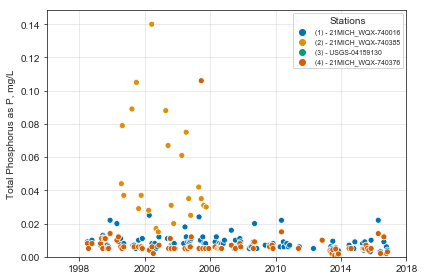

In [54]:
## fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
colors = ["windows blue", "greyish", "faded green", "dusty purple", "amber"]
ax = sns.scatterplot(x='ActivityStartDate', y='ResultMeasureValue', data=sp, hue_order=selected_stations, hue='MonitoringLocationIdentifier', palette=pt, markers=True)
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(selected_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations', fontsize='x-small', loc='best')

# ax.legend(['(1) - HTLP (NCWQR)'], title='Stations', fontsize='x-small', loc=2)

plt.ylim(0,None)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus as P, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('One_by_one/Western/US/'+river+'/'+river+'_TP.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_TP.pdf')



In [55]:
print(sp.groupby('MonitoringLocationIdentifier')["ResultMeasureValue"].describe().reindex(selected_stations).round(2).to_latex())


\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &  mean &   std &   min &   25\% &   50\% &   75\% &   max \\
MonitoringLocationIdentifier &        &       &       &       &       &       &       &       \\
\midrule
21MICH\_WQX-740016            &  112.0 &  0.01 &  0.00 &  0.00 &  0.01 &  0.01 &  0.01 &  0.02 \\
21MICH\_WQX-740385            &   23.0 &  0.05 &  0.03 &  0.02 &  0.03 &  0.04 &  0.07 &  0.14 \\
USGS-04159130                &    NaN &   NaN &   NaN &   NaN &   NaN &   NaN &   NaN &   NaN \\
21MICH\_WQX-740376            &   77.0 &  0.01 &  0.01 &  0.00 &  0.00 &  0.00 &  0.01 &  0.11 \\
\bottomrule
\end{tabular}



In [56]:
selected_stations

['21MICH_WQX-740016',
 '21MICH_WQX-740385',
 'USGS-04159130',
 '21MICH_WQX-740376']

In [57]:
master_stations = [st[0] for st in Show_IDS if st[1]]
# master_stations = selected_stations
master_st_df = sp[sp.MonitoringLocationIdentifier.isin(master_stations)]
master_st_df['USGSPCode'] = 0
master_st_df.shape

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(114, 63)

In [58]:
master_st_df.groupby('ActivityStartDate').mean().shape

(114, 6)

In [59]:
master_st_df[[
    'ActivityStartDate','USGSPCode', 'ResultMeasureValue']].groupby('ActivityStartDate').mean().reset_index().sort_values('ActivityStartDate').to_csv(
    'One_by_one/Western/US/'+river+'/TP_'+river+'iver_data.csv', index=False)

### Discharge

In [60]:
# Finde station here:
# https://www.hydrocloud.org
site = '04159130'
start = '1996-01-01'
end = '2018-11-01'
response = hf.get_nwis(site, 'dv',start, end)
# response.get_data()
discharge = hf.extract_nwis_df(response.json())

In [61]:
discharge.columns

Index(['USGS:04159130:00060:00003', 'USGS:04159130:00060:00003_qualifiers'], dtype='object')

In [62]:
discharge['Flow, CFS']=discharge['USGS:'+site+':00060:00003']

In [63]:
discharge= discharge.reset_index()
discharge['Date']  = discharge['datetime']
discharge['Date'] =pd.to_datetime(discharge['Date'], errors='coerce')
discharge = discharge[['Date', 'Flow, CFS']]
discharge['Source'] = 'USGS-'+site

In [64]:
discharge[discharge.Source=='USGS-'+site][['Date', 'Flow, CFS']].dropna().to_csv('One_by_one/Western/US/'+river+'/Flow_'+river+'_CFS.csv', index=False)


In [65]:
# discharge = discharge.append(df_Q_heideleberg)

In [66]:
discharge['Discharge, cms'] = 0.028*discharge['Flow, CFS']

In [67]:
river

'Clair_R'

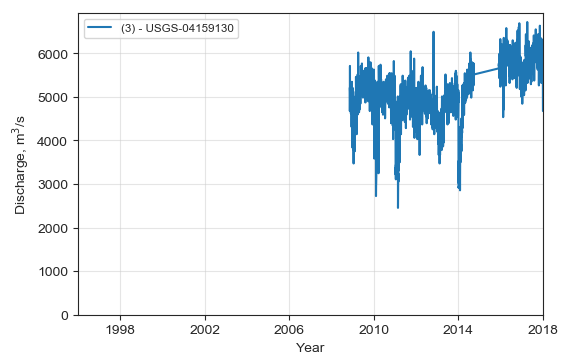

In [83]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source',ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


ax.legend(['(3) - USGS-'+site], loc=2, fontsize='small')
ax.set_ylim(0,None)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('One_by_one/Western/US/'+river+'/'+river+'_Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_Q.pdf')

In [69]:
discharge[['Date', 'Flow, CFS']].to_csv('One_by_one/Western/US/'+river+'/Flow_'+river+'_CFS.csv', index=False)

### EGRET Results

In [3]:
river

'Clair_R'

In [4]:

EGRET_Daily = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US/One_by_one/Western/US/'+river+'/EGRET Result/TP/'+river+'iver_TP_Daily.csv')
EGRET_Sample = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings US/One_by_one/Western/US/'+river+'/EGRET Result/TP/'+river+'iver_TP_Sample.csv')


In [5]:
EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


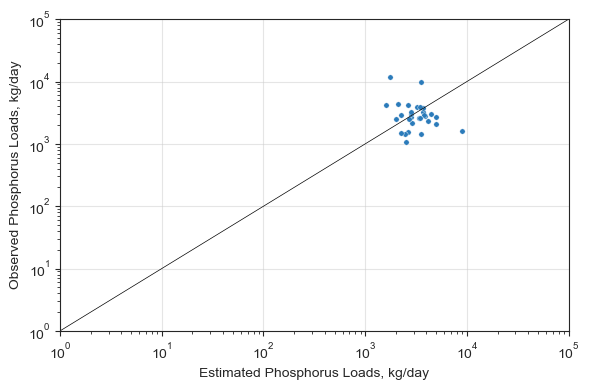

In [6]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,1000000],[-100,1000000], 'k', lw=0.5)
plt.xlim(1,100000)
plt.ylim(1,100000)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Phosphorus Loads, kg/day")
plt.ylabel("Observed Phosphorus Loads, kg/day")
# plt.xlabel("")
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_FvsF.pdf')


In [7]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
EGRET_Daily['Fx_SE'] = (np.exp(EGRET_Daily['SE']+EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000-np.exp(EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000)*365
EGRET_Daily_an = EGRET_Daily.groupby('waterYear').mean().reset_index()


In [8]:
EGRET_Daily_an

,waterYear,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
0,2009,162.5,5119.318753,58184.500000,6.055556,169.771605,2009.304254,1912.166667,162.5,8.536499,5115.197870,5102.490938,-4.734501,0.341856,0.009687,4306.745995,0.010231,4745.528019,1571.962288,595.665443
1,2010,507.0,5090.228545,58529.000000,6.526027,183.838356,2010.248059,1923.501370,507.0,8.528316,5090.882437,5094.880783,-4.936549,0.347528,0.007875,3502.742413,0.008860,4119.898278,1278.500981,493.167056
2,2011,872.0,4757.641366,58894.000000,6.526027,183.838356,2011.248059,1935.501370,872.0,8.457850,4761.974786,4770.736938,-5.193940,0.391217,0.006299,2663.304270,0.008173,3825.751788,972.106059,420.324578
3,2012,1237.5,4909.800739,59259.500000,6.513661,183.500000,2012.248661,1947.497268,1237.5,8.497431,4910.331266,4915.691056,-5.135998,0.426546,0.006574,2803.421922,0.007779,3637.688346,1023.249001,500.283199
4,2013,1601.5,4746.513593,59625.696133,6.571823,185.303867,2013.250054,1959.522099,1601.5,8.461975,4746.379496,4740.545153,-5.296981,0.441538,0.005622,2323.452215,0.007277,3400.129973,848.060058,424.864957
5,2014,1963.0,4970.116398,59988.872576,6.523546,183.728532,2014.244971,1971.465374,1963.0,8.500861,4963.785168,4944.573713,-5.287518,0.448982,0.005773,2537.506809,0.006748,3148.148619,926.189985,469.457292
6,2016,2295.5,5887.295914,60751.476974,5.697368,158.595395,2016.333373,1996.513158,2295.5,8.679306,5883.809535,5871.491885,-4.995316,0.477025,0.007819,3993.429158,0.005828,2708.354595,1457.601643,803.198328
7,2017,2625.5,5844.088024,61082.511236,6.455056,181.646067,2017.238590,2007.387640,2625.5,8.671670,5841.769951,5835.235032,-5.123322,0.464176,0.006774,3421.708782,0.005343,2492.186781,1248.923705,665.762304
8,2018,2985.5,5890.293012,61450.898352,6.530220,183.989011,2018.247781,2019.497253,2985.5,8.676885,5892.226737,5895.948602,-5.191241,0.466177,0.006390,3281.897241,0.004929,2298.645345,1197.892493,642.534794
9,2019,3183.5,6263.332456,61649.500000,10.031250,290.500000,2018.791895,2026.031250,3183.5,8.741547,6232.866563,6118.031638,-5.277988,0.371894,0.005500,2986.305138,0.004403,2118.982185,1090.001375,456.803655


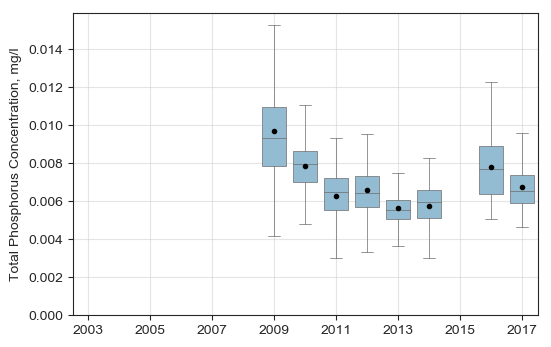

In [11]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", 
                 data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2],
                order=range(2003,2019))

# ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
plt.xlim(-.5, 14.5)
locs, labels = plt.xticks() 
plt.xticks(locs[::2], labels[::2])
plt.ylim(0,None)
# plt.vlines(4.5, 0, 0.6, 'k', '-.', lw=0.7)
# plt.vlines(9.5, 0, 0.6, 'k', '-.', lw=0.7)

# ax.set_xticks([int(x) for x in np.linspace(2003,2017, 8)])

plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus Concentration, mg/l")
plt.xlabel("")
# fig.autofmt_xdate()
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_PC.pdf')




In [12]:
EGRET_Daily.groupby('waterYear').mean()

,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
waterYear,,,,,,,,,,,,,,,,,,,
2009,162.5,5119.318753,58184.500000,6.055556,169.771605,2009.304254,1912.166667,162.5,8.536499,5115.197870,5102.490938,-4.734501,0.341856,0.009687,4306.745995,0.010231,4745.528019,1571.962288,595.665443
2010,507.0,5090.228545,58529.000000,6.526027,183.838356,2010.248059,1923.501370,507.0,8.528316,5090.882437,5094.880783,-4.936549,0.347528,0.007875,3502.742413,0.008860,4119.898278,1278.500981,493.167056
2011,872.0,4757.641366,58894.000000,6.526027,183.838356,2011.248059,1935.501370,872.0,8.457850,4761.974786,4770.736938,-5.193940,0.391217,0.006299,2663.304270,0.008173,3825.751788,972.106059,420.324578
2012,1237.5,4909.800739,59259.500000,6.513661,183.500000,2012.248661,1947.497268,1237.5,8.497431,4910.331266,4915.691056,-5.135998,0.426546,0.006574,2803.421922,0.007779,3637.688346,1023.249001,500.283199
2013,1601.5,4746.513593,59625.696133,6.571823,185.303867,2013.250054,1959.522099,1601.5,8.461975,4746.379496,4740.545153,-5.296981,0.441538,0.005622,2323.452215,0.007277,3400.129973,848.060058,424.864957
2014,1963.0,4970.116398,59988.872576,6.523546,183.728532,2014.244971,1971.465374,1963.0,8.500861,4963.785168,4944.573713,-5.287518,0.448982,0.005773,2537.506809,0.006748,3148.148619,926.189985,469.457292
2016,2295.5,5887.295914,60751.476974,5.697368,158.595395,2016.333373,1996.513158,2295.5,8.679306,5883.809535,5871.491885,-4.995316,0.477025,0.007819,3993.429158,0.005828,2708.354595,1457.601643,803.198328
2017,2625.5,5844.088024,61082.511236,6.455056,181.646067,2017.238590,2007.387640,2625.5,8.671670,5841.769951,5835.235032,-5.123322,0.464176,0.006774,3421.708782,0.005343,2492.186781,1248.923705,665.762304
2018,2985.5,5890.293012,61450.898352,6.530220,183.989011,2018.247781,2019.497253,2985.5,8.676885,5892.226737,5895.948602,-5.191241,0.466177,0.006390,3281.897241,0.004929,2298.645345,1197.892493,642.534794


In [13]:
EGRET_Daily_an['Fx_AE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']




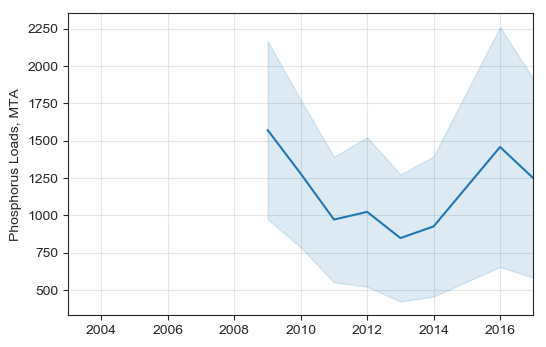

In [14]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

k=None
plt.plot(EGRET_Daily_an['waterYear'][:k], EGRET_Daily_an['FluxYearMTA'][:k], c=sns.color_palette()[0])

# s=12
# plt.plot(EGRET_Daily_an['waterYear'][s:], EGRET_Daily_an['FluxYearMTA'][s:], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]-EGRET_Daily_an['Fx_SE'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]+EGRET_Daily_an['Fx_SE'][:k], 
                 color=sns.color_palette()[0], alpha=0.15)

# plt.fill_between(EGRET_Daily_an['waterYear'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]-EGRET_Daily_an['Fx_SE'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]+EGRET_Daily_an['Fx_SE'][s:], 
#                  color=sns.color_palette()[0], alpha=0.15)



# plt.vlines(2007, 0, 200, 'k', '-.', lw=0.7)
# plt.vlines(2013, 0, 200, 'k', '-.', lw=0.7)


# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.xlim(2003,2017)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
# plt.ylim(0,200)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Phosphorus Loads, MTA")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/US/'+river+'/'+river+'_PFlux.pdf')


In [82]:
print(EGRET_Daily_an[(EGRET_Daily_an.waterYear<2019) & (EGRET_Daily_an.waterYear>2002)][['waterYear', 'FluxYearMTA','Fx_SE']].round(1).T.to_latex(index=False))

\begin{tabular}{rrrrrrrrr}
\toprule
      0 &       1 &       2 &       3 &       4 &       5 &       6 &       7 &       8 \\
\midrule
 2009.0 &  2010.0 &  2011.0 &  2012.0 &  2013.0 &  2014.0 &  2016.0 &  2017.0 &  2018.0 \\
 1572.0 &  1278.5 &   972.1 &  1023.2 &   848.1 &   926.2 &  1457.6 &  1248.9 &  1197.9 \\
  595.7 &   493.2 &   420.3 &   500.3 &   424.9 &   469.5 &   803.2 &   665.8 &   642.5 \\
\bottomrule
\end{tabular}



In [70]:
EGRET_Daily.groupby(['waterYear'])['FluxYearMTA'].describe()

,count,mean,std,min,25%,50%,75%,max
waterYear,,,,,,,,
1996,274.0,203.603293,477.111672,16.061364,37.389145,71.501078,170.484695,5077.715047
1997,365.0,200.187491,361.848846,20.881989,46.419746,82.618436,189.483683,3250.713116
1998,365.0,133.587902,293.503268,20.625407,29.401735,41.847805,119.803747,3039.969067
1999,365.0,97.819505,246.498775,15.535907,26.155248,35.625339,74.874847,2824.818063
2000,366.0,128.882333,240.989282,13.771810,23.254300,38.603404,104.587404,1582.115649
2001,365.0,111.135796,242.627030,16.139908,30.713050,61.613987,107.843994,3440.483540
2002,365.0,104.027655,143.394343,21.661721,33.016774,61.804042,111.018157,1179.019782
2003,365.0,59.304024,103.166788,11.267320,20.359019,27.368358,58.975259,1359.353556
2004,366.0,119.539382,364.300358,16.256246,29.567077,51.679884,103.631932,5899.423453
